In [1]:
import numpy as np
import pylab as plt 
import scipy.stats
from scipy.stats import norm

### Part 1

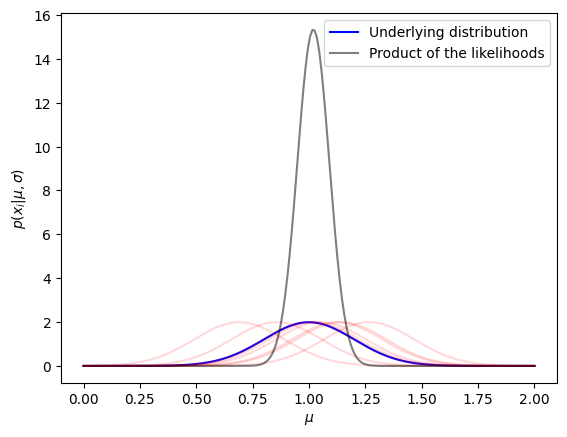

In [2]:
mu = 1
sigma = 0.2
N = 8
np.random.seed(10)
logsum = np.zeros(N)

# Define the Gaussian distribution
gauss = norm(loc=mu, scale=sigma)

# Plot the Gaussian distribution of the underlying process
N_grid = 200
mu_grid = np.linspace(0,2,N_grid)
plt.plot(mu_grid, gauss.pdf(mu_grid), color='blue', label='Underlying distribution')

# Generate fake measurements based on the distribution
measurements = gauss.rvs(size=N)

# Compute and plot the Likelihood for each measurement
L_i = np.array([norm(loc=meas,scale=sigma).pdf(np.linspace(0,2,N_grid)) for meas in measurements])

for L in L_i:
    plt.plot(mu_grid, L, color="red", alpha=0.15)

# Compute the total likelihood and the logL
L = np.prod(L_i,axis=0)
logL = np.sum(np.log(L_i),axis=0)

plt.plot(mu_grid, L, color="k", alpha=0.5, label='Product of the likelihoods')

plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show()

The Likelihood is maximized at 1.015
The MLE estimator is 1.019±0.071


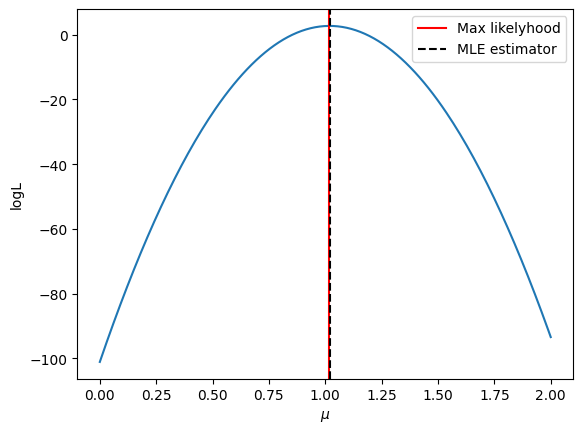

In [3]:
plt.plot(mu_grid, logL)

mu_max = mu_grid[np.argmax(logL)]
print("The Likelihood is maximized at %.3f" % mu_max)

MLE_mean = np.mean(measurements)
MLE_sigma = sigma/np.sqrt(N)
print(r'The MLE estimator is %.3f±%.3f' % (MLE_mean, MLE_sigma))

plt.axvline(mu_max,c='red',label='Max likelyhood')
plt.axvline(MLE_mean,c='k',ls='--',label='MLE estimator')
plt.xlabel(r'$\mu$')
plt.ylabel(r'logL')
plt.legend()
plt.show()

### Part 2

In [4]:
delta_grid = (mu_grid[1]-mu_grid[0])**2
fisher_sigma = -1* np.diff(logL, n=2) / delta_grid
fisher_sigma = 1/np.sqrt(fisher_sigma)[0]

print("Fisher matrix error on estimated mean: %.3f" % fisher_sigma)
print("MLE estimator error: %.3f" % MLE_sigma)

Fisher matrix error on estimated mean: 0.071
MLE estimator error: 0.071


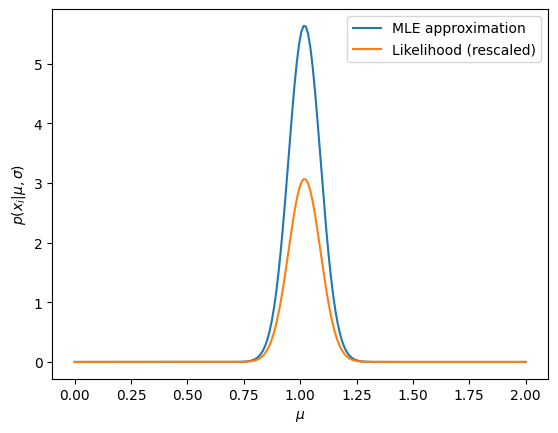

In [5]:
gauss_approx = norm(loc=MLE_mean, scale=MLE_sigma)
plt.plot(mu_grid, gauss_approx.pdf(mu_grid), label='MLE approximation')
plt.plot(mu_grid, L/5, label='Likelihood (rescaled)')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show()

### Part 3

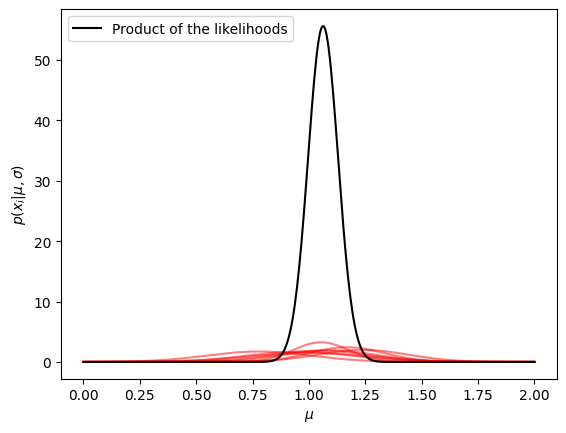

In [6]:
mu = 1

# Distribution of the sigma
mean_sigma = 0.2
sigma_sigma = 0.05

N = 8
np.random.seed(10)
logsum = np.zeros(N)

N_grid = 400
mu_grid = np.linspace(0,2,N_grid)

# Generate fake measurements (with their sigma) based on the distribution
gauss_sigma = norm(loc=mean_sigma, scale=sigma_sigma)
sigmas = gauss_sigma.rvs(size=N)

measurements = np.concatenate([norm(loc=mu, scale=sigma).rvs(1) for sigma in sigmas])

# Compute and plot the Likelihood for each measurement
L_i = np.array([norm(loc=meas, scale=sigma).pdf(np.linspace(0, 2, N_grid)) 
                for meas, sigma in zip(measurements, sigmas)])
for L in L_i:
    plt.plot(mu_grid, L, color="red", alpha=0.5)

# Compute the total likelihood and the logL
L = np.prod(L_i,axis=0)
logL = np.sum(np.log(L_i),axis=0)

plt.plot(mu_grid, L, color="k", alpha=1, label='Product of the likelihoods')

plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show()

#for i in range(N):
#    gauss = norm(loc=mu, scale=sigma[i])
#    mu_proposed = np.linspace(0,2,N)
#    R = gauss.rvs(size=1)
#
#    gaussR = norm(loc=R,scale=sigma[i])
#    plt.plot(mu_proposed, gaussR.pdf(np.linspace(0,2,N)), color="red", alpha=0.15)
#    logsum = logsum + np.log(gaussR.pdf(np.linspace(0,2,N)))  
#
#plt.show()

The Likelihood is maximized at 1.063
The MLE estimator is 1.063±0.067


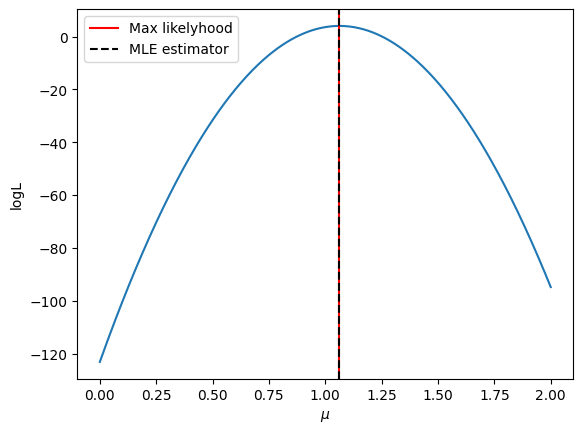

In [7]:
plt.plot(mu_grid, logL)

mu_max = mu_grid[np.argmax(logL)]
print("The Likelihood is maximized at %.3f" % mu_max)

MLE_mean = np.average(measurements,weights=1/sigmas**2)
MLE_sigma = np.sum(sigmas**-2)**-0.5
print(r'The MLE estimator is %.3f±%.3f' % (MLE_mean, MLE_sigma))

plt.axvline(mu_max,c='red',label='Max likelyhood')
plt.axvline(MLE_mean,c='k',ls='--',label='MLE estimator')
plt.xlabel(r'$\mu$')
plt.ylabel(r'logL')
plt.legend()
plt.show()

Fisher matrix error on estimated mean: 0.067
MLE estimator error: 0.067


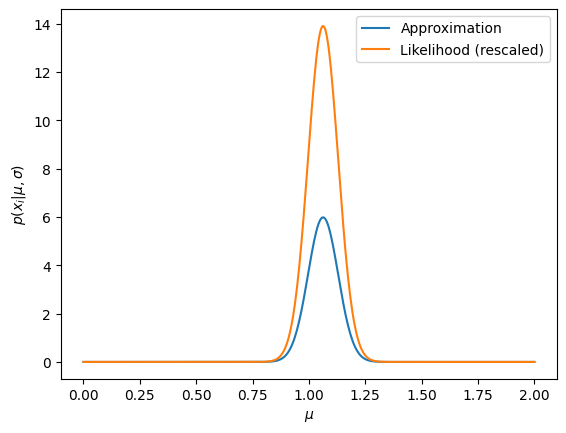

In [8]:
delta_grid = (mu_grid[1]-mu_grid[0])**2
fisher_sigma = -1* np.diff(logL, n=2) / delta_grid
fisher_sigma = 1/np.sqrt(fisher_sigma)[0]

print("Fisher matrix error on estimated mean: %.3f" % fisher_sigma)
print("MLE estimator error: %.3f" % MLE_sigma)

gauss_approx = norm(loc=MLE_mean, scale=MLE_sigma)
plt.plot(mu_grid, gauss_approx.pdf(mu_grid), label='Approximation')
plt.plot(mu_grid, L/4, label='Likelihood (rescaled)')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show()